In [1]:
#Classifier takes integers and regressor takes floats
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB   
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

In [2]:
path = "resources/telecom_cleaned.csv"
df = pd.read_csv(path)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5972,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5973,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5974,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [3]:
#inverse_transform(y) <-- How to turn labels back
label = LabelEncoder()
df = pd.get_dummies(df)


In [4]:
#Correlation matrix
corrMatrix = df.corr()
corrMatrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.004503,0.219009,0.093160,0.007322,-0.007322,-0.015346,0.015346,0.213563,-0.213563,-0.009231,0.009231,-0.126118,-0.009231,0.132937,-0.107680,0.255842,-0.184457,0.185434,-0.184457,-0.037475,0.091739,-0.184457,0.063545,0.093749,-0.184457,0.061556,0.207006,-0.184457,-0.061090,0.052886,-0.184457,0.102486,0.038746,-0.184457,0.116494,0.141155,-0.041164,-0.125103,-0.155442,0.155442,-0.013321,-0.029141,0.170126,-0.149715
tenure,0.004503,1.000000,0.255676,0.827439,-0.003617,0.003617,-0.384269,0.384269,-0.167677,0.167677,-0.009668,0.009668,-0.330257,-0.009668,0.339378,0.009399,0.025484,-0.041666,-0.267053,-0.041666,0.333373,-0.310462,-0.041666,0.358826,-0.314264,-0.041666,0.364705,-0.265411,-0.041666,0.330226,-0.248456,-0.041666,0.285228,-0.261314,-0.041666,0.296686,-0.647753,0.199273,0.564137,-0.005278,0.005278,0.229061,0.236018,-0.202272,-0.230213
MonthlyCharges,0.219009,0.255676,1.000000,0.656534,0.013417,-0.013417,-0.105204,0.105204,0.113888,-0.113888,-0.251798,0.251798,-0.340016,-0.251798,0.495081,-0.162862,0.785723,-0.760743,0.350910,-0.760743,0.303377,0.202055,-0.760743,0.445442,0.168858,-0.760743,0.481627,0.315169,-0.760743,0.341577,0.013440,-0.760743,0.628666,0.012344,-0.760743,0.628068,0.053261,0.005839,-0.067715,-0.355469,0.355469,0.049261,0.027662,0.269427,-0.379051
TotalCharges,0.093160,0.827439,0.656534,1.000000,0.003364,-0.003364,-0.322968,0.322968,-0.065459,0.065459,-0.116877,0.116877,-0.401150,-0.116877,0.475556,-0.056409,0.365467,-0.376236,-0.069169,-0.376236,0.418603,-0.176166,-0.376236,0.507473,-0.188635,-0.376236,0.522803,-0.088151,-0.376236,0.437855,-0.198515,-0.376236,0.517397,-0.210658,-0.376236,0.527628,-0.447572,0.168206,0.360508,-0.162113,0.162113,0.179275,0.182723,-0.054918,-0.294600
gender_Female,0.007322,-0.003617,0.013417,0.003364,1.000000,-1.000000,-0.007460,0.007460,0.008643,-0.008643,-0.006170,0.006170,0.002105,-0.006170,0.001590,-0.008207,0.010869,-0.003633,-0.016105,-0.003633,0.021122,-0.014580,-0.003633,0.018296,-0.000519,-0.003633,0.003686,-0.005873,-0.003633,0.009761,-0.005209,-0.003633,0.008309,-0.005104,-0.003633,0.008168,0.004797,-0.015975,0.009739,-0.013973,0.013973,0.017203,-0.002270,-0.007232,-0.006573
gender_Male,-0.007322,0.003617,-0.013417,-0.003364,-1.000000,1.000000,0.007460,-0.007460,-0.008643,0.008643,0.006170,-0.006170,-0.002105,0.006170,-0.001590,0.008207,-0.010869,0.003633,0.016105,0.003633,-0.021122,0.014580,0.003633,-0.018296,0.000519,0.003633,-0.003686,0.005873,0.003633,-0.009761,0.005209,0.003633,-0.008309,0.005104,0.003633,-0.008168,-0.004797,0.015975,-0.009739,0.013973,-0.013973,-0.017203,0.002270,0.007232,0.006573
Partner_No,-0.015346,-0.384269,-0.105204,-0.322968,-0.007460,0.007460,1.000000,-1.000000,0.448684,-0.448684,0.025797,-0.025797,0.133240,0.025797,-0.150110,0.007904,-0.006707,-0.001045,0.139352,-0.001045,-0.153241,0.145121,-0.001045,-0.150043,0.146907,-0.001045,-0.152729,0.115151,-0.001045,-0.125955,0.130043,-0.001045,-0.129998,0.122175,-0.001045,-0.121434,0.285318,-0.084288,-0.251833,-0.017177,0.017177,-0.099743,

In [18]:
df_test=df[['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes'
           , 'InternetService_Fiber optic', 'InternetService_DSL','OnlineSecurity_No', 'OnlineBackup_Yes',
           'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
           'StreamingMovies_Yes', 'Contract_Two year', 'PaperlessBilling_Yes']]
df_test

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Two year,PaperlessBilling_Yes
0,0,72,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0
1,0,44,0,0,0,1,0,1,0,1,1,1,0,1,0,0,1
2,1,38,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1
3,0,4,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1
4,0,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1
5972,0,23,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1
5973,0,12,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
5974,1,12,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1


In [19]:
corrMatrix = df_test.corr()
corrMatrix

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Two year,PaperlessBilling_Yes
SeniorCitizen,1.000000,0.004503,-0.007322,0.015346,-0.213563,0.009231,0.132937,0.255842,-0.107680,0.185434,0.063545,0.061556,-0.061090,0.102486,0.116494,-0.125103,0.155442
tenure,0.004503,1.000000,0.003617,0.384269,0.167677,0.009668,0.339378,0.025484,0.009399,-0.267053,0.358826,0.364705,0.330226,0.285228,0.296686,0.564137,0.005278
gender_Male,-0.007322,0.003617,1.000000,-0.007460,0.008643,-0.006170,-0.001590,-0.010869,0.008207,0.016105,-0.018296,-0.003686,-0.009761,-0.008309,-0.008168,-0.009739,-0.013973
Partner_Yes,0.015346,0.384269,-0.007460,1.000000,0.448684,0.025797,0.150110,0.006707,-0.007904,-0.139352,0.150043,0.152729,0.125955,0.129998,0.121434,0.251833,-0.017177
Dependents_Yes,-0.213563,0.167677,0.008643,0.448684,1.000000,0.000294,-0.021808,-0.166520,0.051455,-0.192958,0.022271,0.009594,0.067592,-0.018306,-0.037320,0.206752,-0.111229
PhoneService_Yes,0.009231,0.009668,-0.006170,0.025797,0.000294,1.000000,0.284517,0.292582,-0.454799,-0.062464,-0.049087,-0.071106,-0.088645,-0.021240,-0.031032,0.009081,0.021517
MultipleLines_Yes,0.132937,0.339378,-0.001590,0.150110,-0.021808,0.284517,1.000000,0.370390,-0.204969,0.078549,0.209559,0.204625,0.105468,0.253954,0.262335,0.111907,0.169122
InternetService_Fiber optic,0.255842,0.025484,-0.010869,0.006707,-0.166520,0.292582,0.370390,1.000000,-0.643321,0.403989,0.166597,0.172505,-0.016626,0.326707,0.316561,-0.206536,0.329999
InternetService_DSL,-0.107680,0.009399,0.008207,-0.007904,0.051455,-0.454799,-0.204969,-0.643321,1.000000,0.029612,0.157377,0.146952,0.306246,0.017055,0.032088,0.029197,-0.066162
OnlineSecurity_No,0.185434,-0.267053,0.016105,-0.139352,-0.192958,-0.062464,0.078549,0.403989,0.029612,1.000000,0.056580,0.055723,-0.042978,0.171786,0.164823,-0.349340,0.261309


In [20]:
#Drop dependent columns
# df.drop(['MonthlyCharges', 'tenure', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No',
#             'PaperlessBilling_No']
# X = df.drop(['MonthlyCharges', 'tenure', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No',
#             'PaperlessBilling_No', 'MultipleLines_No', 'MultipleLines_No phone service', 'InternetService_No',
#             'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No', 
#             'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service',
#             'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_No internet service',
#             'StreamingMovies_No', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year',
#             'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'], axis=1)

X = df_test

y = df ["MonthlyCharges"]

X

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Two year,PaperlessBilling_Yes
0,0,72,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0
1,0,44,0,0,0,1,0,1,0,1,1,1,0,1,0,0,1
2,1,38,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1
3,0,4,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1
4,0,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1
5972,0,23,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1
5973,0,12,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
5974,1,12,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [22]:
#Rachel's code
model=LinearRegression()

In [23]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9988504177499037
Testing Score: 0.9988770669870324


Text(0.5, 1.0, 'Residual Plot')

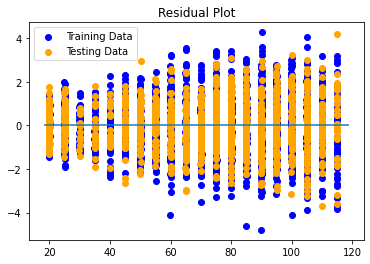

In [24]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [25]:
# #DROPPING DeviceProtection_No internet service to test
# df3 = df2.drop(columns=['DeviceProtection_No internet service'])


In [26]:
def calculate_vif(df):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df.columns
    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

# X=df.drop(['Salary'],axis=1)
calculate_vif(X)

,Var,Vif
1,tenure,5.83
0,SeniorCitizen,1.36
13,StreamingTV_Yes,0.29
4,Dependents_Yes,0.27
15,Contract_Two year,0.24
12,TechSupport_Yes,0.23
6,MultipleLines_Yes,0.23
9,OnlineSecurity_No,0.19
7,InternetService_Fiber optic,0.18
16,PaperlessBilling_Yes,0.16


In [27]:
sc =  StandardScaler()
X_scaler = sc.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

X_train

array([[-0.44181444,  1.56933913,  0.97618706, ...,  1.24653366,
        -0.55793651,  0.82877312],
       [-0.44181444, -1.29048487, -1.02439383, ..., -0.80222463,
        -0.55793651, -1.20660284],
       [-0.44181444,  1.61019376,  0.97618706, ...,  1.24653366,
         1.79231861, -1.20660284],
       ...,
       [-0.44181444,  1.40592062,  0.97618706, ...,  1.24653366,
         1.79231861, -1.20660284],
       [-0.44181444,  0.79310119,  0.97618706, ...,  1.24653366,
         1.79231861,  0.82877312],
       [-0.44181444,  1.61019376, -1.02439383, ...,  1.24653366,
         1.79231861,  0.82877312]])

# Linear Regression

In [28]:
line = LinearRegression()
line.fit(X_train, y_train)


pred_line = line.predict(X_train)
mse = mean_squared_error(y_train, pred_line)
r2 = r2_score(y_train, pred_line)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 1.043230164089477
R-squared (R2 ): 0.9988504177499037


In [29]:
line.score(X_test, y_test)

0.9988770669870324